In [602]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# use LaTeX fonts in the plot
# thanks to https://ercanozturk.org/2017/12/16/python-matplotlib-plots-in-latex/
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [603]:
sns.set()

# high coverage plot

In [677]:
df = pd.read_csv('experiments/results/high-coverage-evaluation-aggregate.csv')

In [678]:
aa = df.columns.tolist()
aa[0] = 'metric'
df.columns = aa

In [679]:
df.head()

,metric,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,popcover,5.0,17.400000,5.412947,14.000000,15.000000,15.000000,16.00,27.000000
1,alleles,strobe,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
2,alleles,strobe-ig,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
3,alleles,strobe-val,5.0,27.000000,0.000000,27.000000,27.000000,27.000000,27.00,27.000000
4,conservation,popcover,5.0,0.412791,0.016112,0.390741,0.408394,0.410247,0.42,0.434572


In [684]:
res = df[df.vax != 'strobe-val'].pivot('metric', 'vax', ['mean', 'std']).loc[['conservation', 'immunogen', 'norm_prot_coverage', 'rel_pop_coverage']]
res

mean                           std                    
vax                 popcover    strobe strobe-ig  popcover    strobe strobe-ig
metric                                                                        
conservation        0.412791  0.454896  0.011823  0.016112  0.017341  0.005021
immunogen           1.282314  1.842797  2.797114  0.013958  0.036225  0.061757
norm_prot_coverage  0.941046  0.942483  0.116742  0.022698  0.021752  0.048611
rel_pop_coverage    0.906953  1.000000  1.000000  0.053777  0.000000  0.000000

In [685]:
max_ig = res['mean']['strobe-ig']['immunogen']
res.loc['immunogen'] = res.loc['immunogen'] / max_ig  # here we normalize std. as well

In [686]:
res = res.rename(index={
    'conservation': 'Conservation',
    'immunogen': 'Immunogen.\n100\\%%=%.3f' % max_ig,
    'norm_prot_coverage': 'Pathogen\nCoverage',
    'rel_pop_coverage': 'Population\nCoverage'
}, columns={
    'strobe': 'GenEv',
    'strobe-ig': 'GenEv$^+$',
    'popcover': 'PopCover',
})

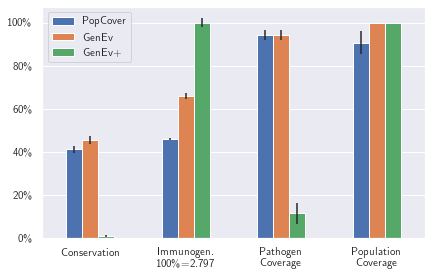

In [687]:
res['mean'].plot.bar(rot=0, yerr=res['std'])
plt.grid(False, axis='x')
plt.xlabel('')
plt.legend(['PopCover', 'GenEv', 'GenEv+'])
plt.tight_layout()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])
plt.savefig('plots/high-cov.pdf')

# pareto plot

In [674]:
dfs = []
for i in range(1, 6):
    df = pd.read_csv('experiments/results/nef-300-%d/made-tradeoff.csv' % i)
    df['rep'] = i
    dfs.append(df)
df = pd.concat(dfs)
df.head()

,immunogenicity,cleavage,rep
0,2.827592,-5.793313,1
1,2.813919,-9.948271,1
2,2.802330,-11.247685,1
3,2.778687,-13.134337,1
4,2.746615,-15.537919,1


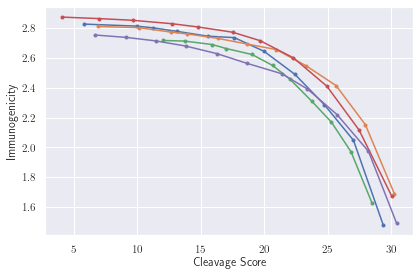

In [675]:
for rep in df.rep.unique():
    data = df[df.rep == rep]
    plt.plot(-data.cleavage, data.immunogenicity, '.-')
plt.xlabel('Cleavage Score')
plt.ylabel('Immunogenicity')
plt.tight_layout()
plt.savefig('plots/pareto.pdf')

# advantage

In [645]:
df = pd.read_csv('experiments/results/advantage-evaluation-summary.csv')
df.head()

,Unnamed: 0,size,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,180,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
1,alleles,180-o4,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
2,alleles,180-o8,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
3,alleles,360,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
4,alleles,360-o4,mosaic,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0


In [646]:
aaa = df.columns.tolist()
aaa[0] = 'metric'
df.columns = aaa

In [647]:
df['vax'] = df.apply(lambda x: x['vax'] if '-' not in x['size'] else x['vax'] + '-' + x['size'].split('-')[1], axis=1)
df['size'] = df['size'].apply(lambda x: int(x.split('-')[0]))

In [648]:
df.head()

,metric,size,vax,count,mean,std,min,25%,50%,75%,max
0,alleles,180,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
1,alleles,180,mosaic-o4,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
2,alleles,180,mosaic-o8,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
3,alleles,360,optitope,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0
4,alleles,360,mosaic-o4,5.0,27.0,0.0,27.0,27.0,27.0,27.0,27.0


In [649]:
df = df.replace({
    'optitope': 'SoB',
    'mosaic-o4': 'm4',
    'mosaic-o8': 'm8',
})

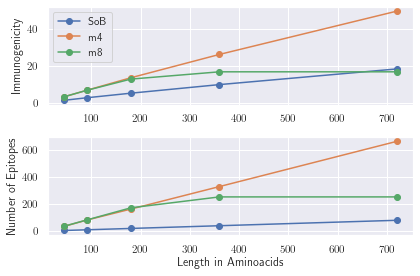

In [650]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for i, vax in enumerate(df.vax.unique()):
    data = df[(df.vax == vax) & (df['size'] < 1000)].sort_values('size')
    data_ig = data[data.metric == 'immunogen']
    data_eps = data[data.metric == 'num_epitopes']
    
    ax1.plot(data_ig['size'], data_ig['mean'], 'o-', label=vax, color='C%d' % i)
    ax2.plot(data_eps['size'], data_eps['mean'], 'o-', label=vax, color='C%d' % i)

plt.tight_layout()
ax2.set_xlabel('Length in Aminoacids')
ax1.set_ylabel('Immunogenicity')
ax2.set_ylabel('Number of Epitopes')
ax1.legend()
plt.tight_layout()
plt.savefig('plots/advantage.pdf')

# cocktail

We parse the log file and look for this piece:

```
2019-09-24 10:51:58,687 INFO: The polypeptide has 184 epitopes 
2019-09-24 10:51:58,687 INFO: The epitopes have immunogenicity 2.316
2019-09-24 10:51:58,687 INFO: The epitopes cover 27 alleles
2019-09-24 10:51:58,687 INFO: The maximum population coverage is 91.29%
2019-09-24 10:51:58,687 INFO: The epitopes cover 91.29% of the population (100.00% of the maximum)
2019-09-24 10:51:58,688 INFO: The epitopes cover 1736 proteins (90.56% of the total)
2019-09-24 10:51:58,688 INFO: The average epitope conservation is 13.17%
```

Every piece is about a different chain, exept for the last one which is about the vaccine as a whole.

In [688]:
import re

epis, immunogs, popc, protc, cons = [], [], [], [], []
with open('experiments/results/hiv1bc-full/mosaic-4cocktail-evaluation.log') as f:
    for row in f:
        match = re.search(r'The polypeptide has (\d+) epitopes', row)
        if match:
            epis.append(int(match.group(1)))
            continue
        
        match = re.search(r'The epitopes have immunogenicity ([0-9.]+)', row)
        if match:
            immunogs.append(float(match.group(1)))
            continue
        
        match = re.search(r'The epitopes cover [0-9.]+% of the population \(([0-9.]+)% of the maximum\)', row)
        if match:
            popc.append(float(match.group(1)) / 100)
            continue
        
        match = re.search(r'The epitopes cover \d+ proteins \(([0-9.]+)% of the total\)', row)
        if match:
            protc.append(float(match.group(1)) / 100)
            continue
        
        match = re.search(r'The average epitope conservation is ([0-9.]+)%', row)
        if match:
            cons.append(float(match.group(1)) / 100)

In [689]:
mos_df = pd.DataFrame({
    'num_epitopes': epis,
    'immunogen': immunogs,
    'rel_pop_coverage': popc,
    'norm_prot_coverage': protc,
    'conservation': cons,
    'vax': ['chain-%d' % i for i in range(len(epis) - 1)] + ['mosaic'],
})
mos_df

,num_epitopes,immunogen,rel_pop_coverage,norm_prot_coverage,conservation,vax
0,46,3.350,1.0,0.8367,0.1628,chain-0
1,46,2.210,1.0,0.9061,0.1377,chain-1
2,46,3.210,1.0,0.8998,0.1647,chain-2
3,46,3.467,1.0,0.9457,0.2915,chain-3
4,184,12.236,1.0,0.9896,0.1892,mosaic


In [690]:
ot_df = pd.read_csv('experiments/results/hiv1bc-full/optitope-p99-evaluation.csv')
ot_df = ot_df.drop(['prot_coverage', 'alleles', 'pop_coverage', 'max_pop_coverage'], axis=1)
ot_df['vax'] = 'optitope'
ot_df

,norm_prot_coverage,num_epitopes,conservation,rel_pop_coverage,immunogen,vax
0,0.989045,24,0.098809,1.0,5.631012,optitope


In [706]:
df = pd.concat([mos_df, ot_df], sort=True)
df

,conservation,immunogen,norm_prot_coverage,num_epitopes,rel_pop_coverage,vax
0,0.162800,3.350000,0.836700,46,1.0,chain-0
1,0.137700,2.210000,0.906100,46,1.0,chain-1
2,0.164700,3.210000,0.899800,46,1.0,chain-2
3,0.291500,3.467000,0.945700,46,1.0,chain-3
4,0.189200,12.236000,0.989600,184,1.0,mosaic
0,0.098809,5.631012,0.989045,24,1.0,optitope


In [707]:
def num_epis_to_num_aas(x):
    if x['vax'].startswith('chain'):
        return x['num_epitopes'] + 8
    elif x['vax'] == 'mosaic':
        return 0.0
    elif x['vax'] == 'optitope':
        return x['num_epitopes'] * 9
    
df['num_aas'] = df.apply(num_epis_to_num_aas, axis=1)
df.loc[(df.vax == 'mosaic'), 'num_aas'] = df[df.vax.str.startswith('chain-')].num_aas.sum()

max_ig, max_aas = df.immunogen.max(), df.num_aas.max()
df.immunogen = df.immunogen / max_ig
df.num_aas = df.num_aas / max_aas

In [708]:
res = df.drop(['vax', 'num_epitopes'], axis=1).T
res.columns = df.vax
res

vax,chain-0,chain-1,chain-2,chain-3,mosaic,optitope
conservation,0.162800,0.137700,0.164700,0.291500,0.1892,0.098809
immunogen,0.273782,0.180615,0.262341,0.283344,1.0000,0.460200
norm_prot_coverage,0.836700,0.906100,0.899800,0.945700,0.9896,0.989045
rel_pop_coverage,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000
num_aas,0.250000,0.250000,0.250000,0.250000,1.0000,1.000000


In [709]:
res = res.rename(index={
    'conservation': 'Epitope\nConservation',
    'immunogen': 'Immunogen.\n100\\%%=%.3f' % max_ig,
    'norm_prot_coverage': 'Pathogen\nCoverage',
    'rel_pop_coverage': 'Population\nCoverage',
    'num_aas': 'Amino Acids\n100\\%%=%d' % max_aas,
})

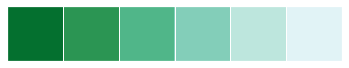

In [710]:
sns.palplot(sns.color_palette("BuGn_r"))

In [711]:
import matplotlib.patches as mpatches

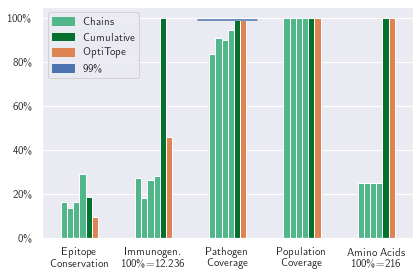

In [712]:
pal = sns.color_palette("BuGn_r")
res.plot.bar(color=[
    #pal[0], pal[1], pal[2], pal[3], 'C2', 'C1'
    pal[2], pal[2], pal[2], pal[2], pal[0], 'C1'
], rot=0, legend=False)
plt.plot([1.6, 2.4], [0.99, 0.99], color='C0')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'])

plt.legend(handles=[
    mpatches.Patch(color=pal[2], label='Chains'),
    mpatches.Patch(color=pal[0], label='Cumulative'),
    mpatches.Patch(color='C1', label='OptiTope'),
    mpatches.Patch(color='C0', label='99\%'),
])
plt.grid(False, axis='x')

plt.tight_layout()
plt.savefig('plots/cocktail.pdf')